In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller

In [2]:
#Importing and loading the dataset
df = pd.read_csv("C:/Users/Hanish Soni/Downloads/Product Demand.csv")

In [3]:
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0965,St john's,Category_006,2014-01-08,2.0
1,Product_1724,St john's,Category_003,2014-05-31,108.0
2,Product_1521,Surrey,Category_019,2014-06-24,85000.0
3,Product_1521,Surrey,Category_019,2014-06-24,7000.0
4,Product_1507,Oshawa,Category_019,2014-09-02,1250.0


In [4]:
# Check Shape & data Types

print(df.shape)
print(df.dtypes)

(1048575, 5)
Product_Code         object
Warehouse            object
Product_Category     object
Date                 object
Order_Demand        float64
dtype: object


In [5]:
# Check columns for missing values and return the number of NaN in each column
missing_values_per_column = df.isnull().sum()

# Print the result
print("Number of missing values per column:")
print(missing_values_per_column)

# Calculate the percentage of missing data in the entire DataFrame
percentage_missing = (df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100

# Print the result
print("% of Data missing =", percentage_missing)


Number of missing values per column:
Product_Code            0
Warehouse               0
Product_Category        0
Date                11239
Order_Demand            0
dtype: int64
% of Data missing = 0.21436711727821092


In [6]:
#check for all the date types and nature.
df.dtypes

Product_Code         object
Warehouse            object
Product_Category     object
Date                 object
Order_Demand        float64
dtype: object

In [7]:
# Remove rows with missing values
df_cleaned = df.dropna(axis=0).reset_index(drop=True)

# Set date as the index column
df_cleaned.set_index('Date', inplace=True)  # replace 'date' with the actual name of your date column

# Check for missing values in the cleaned DataFrame
missing_values_after_cleanup = df_cleaned.isnull().sum()

# Print the result
print("Number of missing values after cleaning:")
print(missing_values_after_cleanup)


Number of missing values after cleaning:
Product_Code        0
Warehouse           0
Product_Category    0
Order_Demand        0
dtype: int64


In [8]:
# Check which columns have null values
null_values_per_column = df.isna().sum()

# Print the result
print("Number of null values per column:")
print(null_values_per_column)

# Print the Null Value to Dataset Ratio for the "Dates" column
dates_column_null_ratio = null_values_per_column['Date'] / df.shape[0] * 100
print('Null to Dataset Ratio for "Dates" Column:', dates_column_null_ratio)

# Confirming that there are missing values in the "Dates" column and the ratio is 1%


Number of null values per column:
Product_Code            0
Warehouse               0
Product_Category        0
Date                11239
Order_Demand            0
dtype: int64
Null to Dataset Ratio for "Dates" Column: 1.0718355863910547


In [9]:
# Convert the 'Date' column to the required format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')

# Print the DataFrame to confirm the changes
print(df)


         Product_Code  Warehouse Product_Category       Date  Order_Demand
0        Product_0965  St john's     Category_006 2014-01-08           2.0
1        Product_1724  St john's     Category_003 2014-05-31         108.0
2        Product_1521     Surrey     Category_019 2014-06-24       85000.0
3        Product_1521     Surrey     Category_019 2014-06-24        7000.0
4        Product_1507     Oshawa     Category_019 2014-09-02        1250.0
...               ...        ...              ...        ...           ...
1048570  Product_1464  St john's     Category_019        NaT         900.0
1048571  Product_1541  St john's     Category_019        NaT         200.0
1048572  Product_1388  St john's     Category_019        NaT         300.0
1048573  Product_1541  St john's     Category_019        NaT         300.0
1048574  Product_1509  St john's     Category_019        NaT         200.0

[1048575 rows x 5 columns]


In [10]:
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0965,St john's,Category_006,2014-01-08,2.0
1,Product_1724,St john's,Category_003,2014-05-31,108.0
2,Product_1521,Surrey,Category_019,2014-06-24,85000.0
3,Product_1521,Surrey,Category_019,2014-06-24,7000.0
4,Product_1507,Oshawa,Category_019,2014-09-02,1250.0


In [11]:
#Printing the number of records and variables
df.shape

(1048575, 5)

In [12]:
#check for all the date types and nature.
df.dtypes

Product_Code                object
Warehouse                   object
Product_Category            object
Date                datetime64[ns]
Order_Demand               float64
dtype: object

In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Product_Code      1048575 non-null  object        
 1   Warehouse         1048575 non-null  object        
 2   Product_Category  1048575 non-null  object        
 3   Date              1035585 non-null  datetime64[ns]
 4   Order_Demand      1048575 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 40.0+ MB


In [14]:
# checking the number of unique values and a few sample of values in each column
for i in df.columns:
  print(i, len(list(df[i].unique())), list(df[i].unique())[:5])

Product_Code 2157 ['Product_0965', 'Product_1724', 'Product_1521', 'Product_1507', 'Product_0608']
Warehouse 4 ["St john's", 'Surrey', 'Oshawa', 'Brampton']
Product_Category 33 ['Category_006', 'Category_003', 'Category_019', 'Category_001', 'Category_023']
Date 1714 [numpy.datetime64('2014-01-08T00:00:00.000000000'), numpy.datetime64('2014-05-31T00:00:00.000000000'), numpy.datetime64('2014-06-24T00:00:00.000000000'), numpy.datetime64('2014-09-02T00:00:00.000000000'), numpy.datetime64('2014-09-27T00:00:00.000000000')]
Order_Demand 9394 [2.0, 108.0, 85000.0, 7000.0, 1250.0]


In [15]:
# value counts of Warehouse
df['Warehouse'].value_counts()

Brampton     763209
St john's    153551
Surrey        88916
Oshawa        42899
Name: Warehouse, dtype: int64

In [16]:
# value counts of Product_Category
df['Product_Category'].value_counts()

Category_019    481141
Category_005    101748
Category_001     97704
Category_007     82142
Category_021     51901
Category_006     35601
Category_028     31366
Category_011     23196
Category_015     22876
Category_024     21048
Category_009     19704
Category_026     14758
Category_030     13060
Category_032      9235
Category_022      8793
Category_023      7901
Category_018      5314
Category_003      4206
Category_013      3731
Category_020      3487
Category_031      2290
Category_033      1858
Category_008      1544
Category_012      1175
Category_010       975
Category_029       671
Category_017       621
Category_004       329
Category_002        77
Category_016        37
Category_025        35
Category_014        26
Category_027        25
Name: Product_Category, dtype: int64

In [17]:
#Dropping duplicates
df = df.drop_duplicates()

In [18]:
#Checking for missing values
df.isnull().sum()

Product_Code           0
Warehouse              0
Product_Category       0
Date                2523
Order_Demand           0
dtype: int64

In [19]:
# Drop rows with missing values since they are few in number and won't significantly impact analysis
df = df.dropna()

# Print the DataFrame after dropping missing values
print("DataFrame after dropping missing values:")
print(df)


DataFrame after dropping missing values:
         Product_Code  Warehouse Product_Category       Date  Order_Demand
0        Product_0965  St john's     Category_006 2014-01-08           2.0
1        Product_1724  St john's     Category_003 2014-05-31         108.0
2        Product_1521     Surrey     Category_019 2014-06-24       85000.0
3        Product_1521     Surrey     Category_019 2014-06-24        7000.0
4        Product_1507     Oshawa     Category_019 2014-09-02        1250.0
...               ...        ...              ...        ...           ...
1037331  Product_1954   Brampton     Category_001 2017-01-06           3.0
1037332  Product_1710   Brampton     Category_026 2017-01-06          15.0
1037333  Product_1904     Oshawa     Category_019 2017-01-09        4000.0
1037334  Product_0250     Oshawa     Category_007 2017-01-09         148.0
1037335  Product_0471     Oshawa     Category_015 2017-01-09          30.0

[921918 rows x 5 columns]


In [20]:
# Get the earliest and latest dates in the dataset
earliest_date = df['Date'].min()
latest_date = df['Date'].max()

# Print the results
print("Earliest Date:", earliest_date)
print("Latest Date:", latest_date)


Earliest Date: 2014-01-08 00:00:00
Latest Date: 2019-12-30 00:00:00


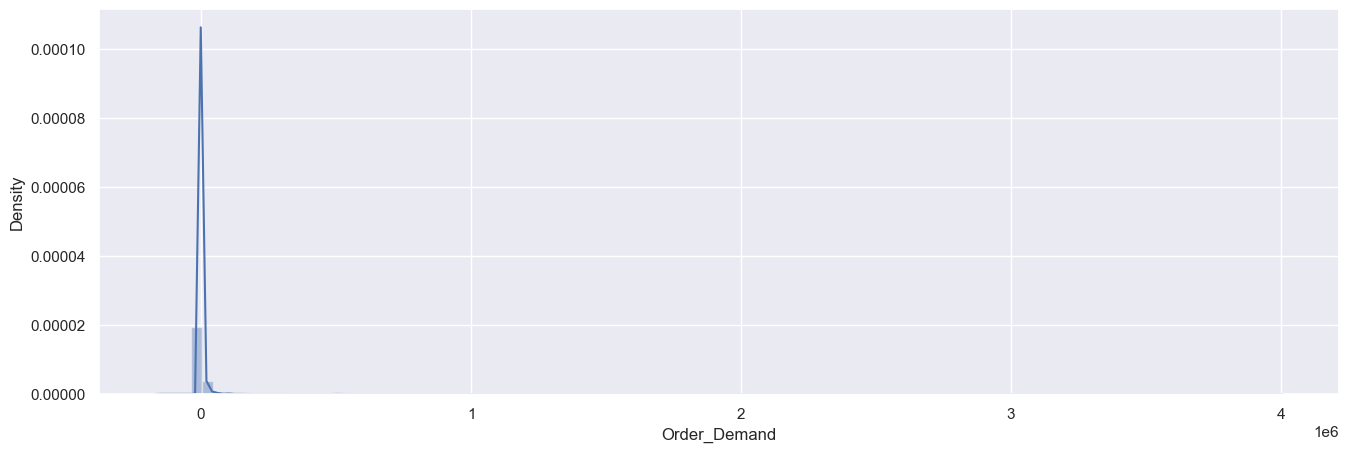

In [21]:
import seaborn as sns
sns.set(rc={'figure.figsize':(16,5)})
sns.distplot(df['Order_Demand'], bins = 100);
# it can seen that most of our demand lies between 0 to 500000, which is highly skewed


### The majority of demand instances are concentrated in the range of 0 to 500,000.

In [22]:
# Group by 'Warehouse' and calculate the sum of 'Order_Demand', then sort in descending order
warehouse_demand = df.groupby('Warehouse')['Order_Demand'].sum().sort_values(ascending=False)

# Print the result
print("Total Order Demand by Warehouse (Descending Order):")
print(warehouse_demand)


Total Order Demand by Warehouse (Descending Order):
Warehouse
Brampton     2.673009e+09
Surrey       9.476132e+08
Oshawa       4.889082e+08
St john's    8.823970e+07
Name: Order_Demand, dtype: float64


### Brampton dominates with the highest order demand, influencing strategic decisions in supply chain management. Surrey and Oshawa follow with significant demand, while St John's has comparatively lower demand.

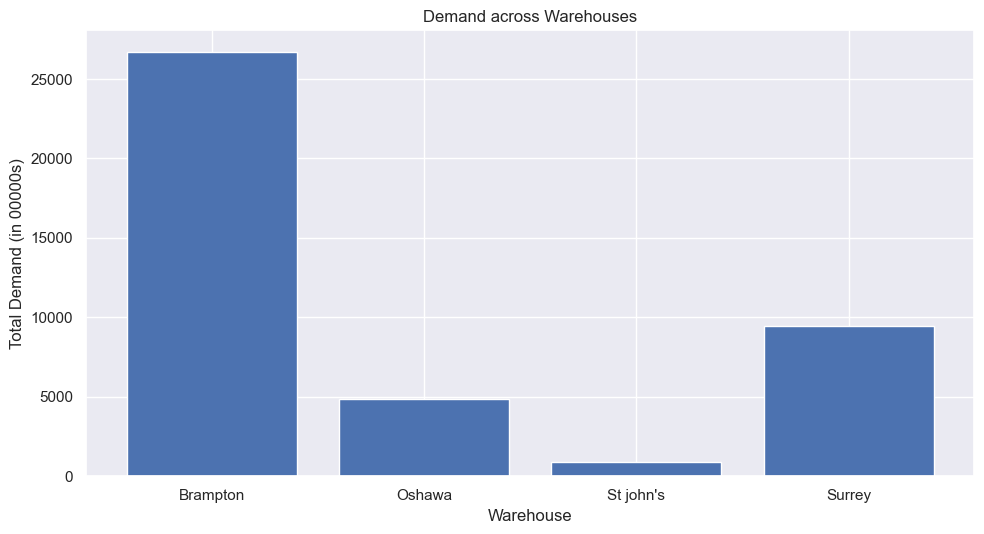

In [23]:
# Grouping the data by Warehouse and aggregating by positive demand
warehouse_grouped = df.groupby('Warehouse')['Order_Demand'].sum()

# Scaling the figures down by 100000
warehouse_grouped_div = warehouse_grouped.div(100000)

# Plotting the demand for each category using Matplotlib
plt.figure(figsize=(10, 5.5))
plt.bar(warehouse_grouped_div.index, warehouse_grouped_div)
plt.title('Demand across Warehouses')
plt.xlabel('Warehouse')
plt.ylabel('Total Demand (in 00000s)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### The bar plot illustrates the total demand across different warehouses, revealing that Brampton has the highest demand among the observed warehouses.

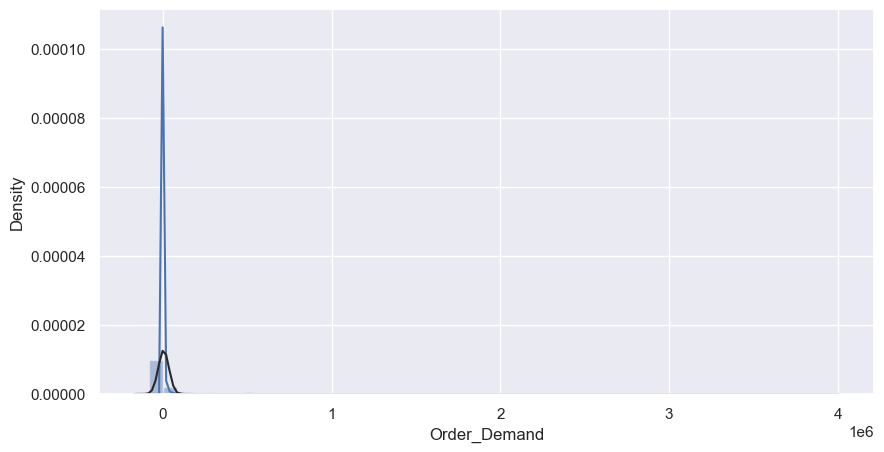

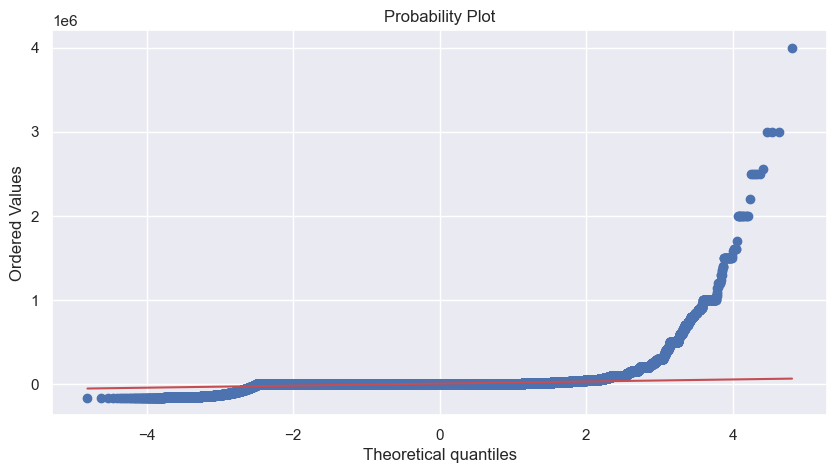

In [24]:
from matplotlib import rcParams
from scipy import stats

# Set figure size in inches
rcParams['figure.figsize'] = 10, 5

# Create a distribution plot using Seaborn
sns.distplot(df['Order_Demand'], fit=stats.norm)

# Get the QQ-plot
fig = plt.figure()
res = stats.probplot(df['Order_Demand'], plot=plt)
plt.show()


The distribution plot indicates a highly skewed order demand distribution, with a concentration of values between 0 and 500,000, while the QQ-plot visually assesses the departure from normality, revealing deviations in the tails of the distribution.

In [25]:
# Group by 'Product_Category' and calculate the sum of 'Order_Demand', then sort in descending order
product_category_demand = df.groupby('Product_Category')['Order_Demand'].sum().sort_values(ascending=False)

# Create a DataFrame with the total demand and percentage contribution
df1 = pd.DataFrame(product_category_demand)
df1["% Contribution"] = df1['Order_Demand'] / df1['Order_Demand'].sum() * 100

# Print the result
print("Total Order Demand by Product Category and % Contribution:")
print(df1)


Total Order Demand by Product Category and % Contribution:
                  Order_Demand  % Contribution
Product_Category                              
Category_019      3.602022e+09       85.807974
Category_006      3.713073e+08        8.845346
Category_005      1.286252e+08        3.064132
Category_007      1.025473e+08        2.442900
Category_033      3.831856e+07        0.912831
Category_028      3.046923e+07        0.725843
Category_030      2.971262e+07        0.707819
Category_032      3.323151e+06        0.079165
Category_020      2.335175e+06        0.055629
Category_025      4.860000e+05        0.011578
Category_023      4.856162e+05        0.011568
Category_013      3.068320e+05        0.007309
Category_004      9.511700e+04        0.002266
Category_029      2.334800e+04        0.000556
Category_010      1.987100e+04        0.000473
Category_008      1.693700e+04        0.000403
Category_016      1.685000e+04        0.000401
Category_002      6.240000e+02        0.000015
C

### Total order demand by product category reveals that 'Category_019' dominates with approximately 85.81% of the total demand, followed by 'Category_006' with 8.85%. The top five categories contribute significantly to the overall order demand, providing insights into the distribution of demand across different product categories.

In [26]:
df2 = pd.pivot_table(df,index=["Date"],values=["Order_Demand"],columns=["Product_Category"],aggfunc=np.sum)
df2.columns = df2.columns.droplevel(0)
df2["Category_019"].dropna()
# Creating Pivot table with date as index, Product category as columns & and values as sum

Date
2014-06-24      92000.0
2014-09-02       1250.0
2014-10-31          3.0
2014-11-24      40000.0
2014-11-25      17250.0
                ...    
2019-12-26    2546106.0
2019-12-27    1224194.0
2019-12-28    1655721.0
2019-12-29     338451.0
2019-12-30     621700.0
Name: Category_019, Length: 1592, dtype: float64

In [27]:
#The data is highly skewed
df['Order_Demand'].skew()

27.3794367154666

In [28]:
# Checking if any order demand is negative
negative_demand_rows = df[df['Order_Demand'] < 0]

# Print the rows with negative order demand
print("Rows with Negative Order Demand:")
print(negative_demand_rows)


Rows with Negative Order Demand:
        Product_Code Warehouse Product_Category       Date   Order_Demand
849249  Product_1394    Oshawa     Category_019 2019-01-04     -23.743563
849250  Product_1431    Oshawa     Category_019 2019-01-04     -50.954626
849251  Product_0439    Oshawa     Category_012 2019-01-04     -78.165689
849252  Product_1794    Oshawa     Category_024 2019-01-04    -105.376751
849253  Product_1356    Oshawa     Category_019 2019-01-04    -132.587814
...              ...       ...              ...        ...            ...
855241  Product_1637  Brampton     Category_019 2019-01-05 -163072.432100
855242  Product_1216  Brampton     Category_019 2019-01-05 -163099.643200
855243  Product_1274  Brampton     Category_019 2019-01-05 -163126.854200
855244  Product_1359  Brampton     Category_019 2019-01-05 -163154.065300
855245  Product_1451  Brampton     Category_019 2019-01-05 -163181.276400

[5997 rows x 5 columns]


In [29]:
# Creating a DataFrame with negative demand
negative_demand_rows = df[df['Order_Demand'] < 0]

# Print the DataFrame with negative demand
print("DataFrame with Negative Order Demand:")
print(negative_demand_rows)


DataFrame with Negative Order Demand:
        Product_Code Warehouse Product_Category       Date   Order_Demand
849249  Product_1394    Oshawa     Category_019 2019-01-04     -23.743563
849250  Product_1431    Oshawa     Category_019 2019-01-04     -50.954626
849251  Product_0439    Oshawa     Category_012 2019-01-04     -78.165689
849252  Product_1794    Oshawa     Category_024 2019-01-04    -105.376751
849253  Product_1356    Oshawa     Category_019 2019-01-04    -132.587814
...              ...       ...              ...        ...            ...
855241  Product_1637  Brampton     Category_019 2019-01-05 -163072.432100
855242  Product_1216  Brampton     Category_019 2019-01-05 -163099.643200
855243  Product_1274  Brampton     Category_019 2019-01-05 -163126.854200
855244  Product_1359  Brampton     Category_019 2019-01-05 -163154.065300
855245  Product_1451  Brampton     Category_019 2019-01-05 -163181.276400

[5997 rows x 5 columns]


In [30]:
# Creating a DataFrame with positive demand
positive_demand_rows = df[df['Order_Demand'] >= 0]

# Print the DataFrame with positive demand
print("DataFrame with Positive Order Demand:")
print(positive_demand_rows)


DataFrame with Positive Order Demand:
         Product_Code  Warehouse Product_Category       Date  Order_Demand
0        Product_0965  St john's     Category_006 2014-01-08           2.0
1        Product_1724  St john's     Category_003 2014-05-31         108.0
2        Product_1521     Surrey     Category_019 2014-06-24       85000.0
3        Product_1521     Surrey     Category_019 2014-06-24        7000.0
4        Product_1507     Oshawa     Category_019 2014-09-02        1250.0
...               ...        ...              ...        ...           ...
1037331  Product_1954   Brampton     Category_001 2017-01-06           3.0
1037332  Product_1710   Brampton     Category_026 2017-01-06          15.0
1037333  Product_1904     Oshawa     Category_019 2017-01-09        4000.0
1037334  Product_0250     Oshawa     Category_007 2017-01-09         148.0
1037335  Product_0471     Oshawa     Category_015 2017-01-09          30.0

[915921 rows x 5 columns]


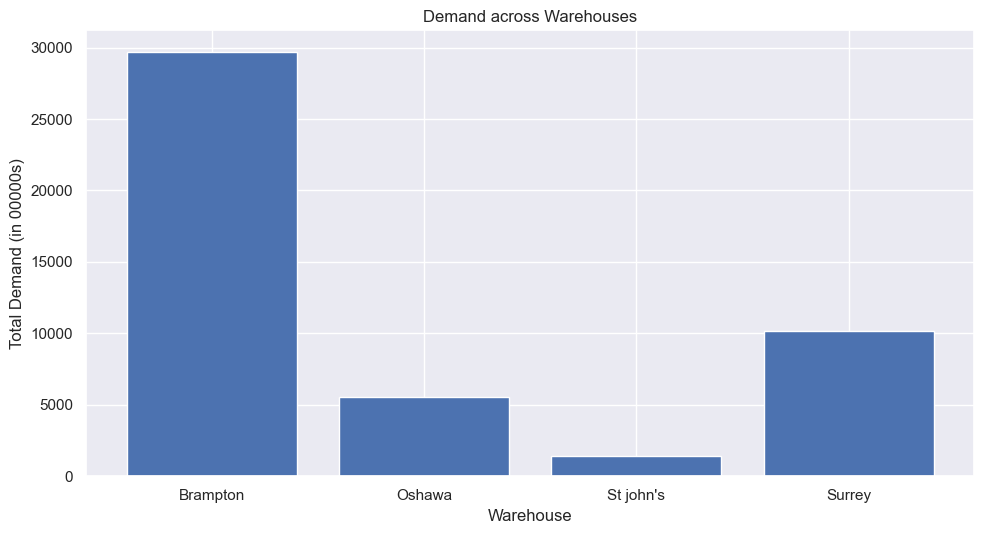

In [31]:
# Grouping the data by Warehouse and aggregating by positive demand
warehouse_grouped = positive_demand_rows.groupby('Warehouse')['Order_Demand'].sum()

# Scaling the figures down by 100000
warehouse_grouped_div = warehouse_grouped.div(100000)

# Plotting the demand for each warehouse using Matplotlib
plt.figure(figsize=(10, 5.5))
plt.bar(warehouse_grouped_div.index, warehouse_grouped_div)
plt.title('Demand across Warehouses')
plt.xlabel('Warehouse')
plt.ylabel('Total Demand (in 00000s)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Brampton has the highest demand, surpassing other warehouses. 

In [33]:
# Filtering the data for the warehouse in Arizona
df_Brampton = positive_demand_rows[positive_demand_rows['Warehouse'] == 'Brampton']
print(df_Brampton)


         Product_Code Warehouse Product_Category       Date  Order_Demand
24       Product_0138  Brampton     Category_007 2014-11-22         188.0
25       Product_0138  Brampton     Category_007 2014-11-22        1852.0
47       Product_0504  Brampton     Category_015 2014-12-05           1.0
48       Product_0138  Brampton     Category_007 2014-12-05         240.0
68       Product_1699  Brampton     Category_026 2014-12-07           1.0
...               ...       ...              ...        ...           ...
1037324  Product_0025  Brampton     Category_005 2017-01-06         700.0
1037326  Product_1453  Brampton     Category_019 2017-01-06        8000.0
1037328  Product_1241  Brampton     Category_019 2017-01-06       20000.0
1037331  Product_1954  Brampton     Category_001 2017-01-06           3.0
1037332  Product_1710  Brampton     Category_026 2017-01-06          15.0

[658876 rows x 5 columns]


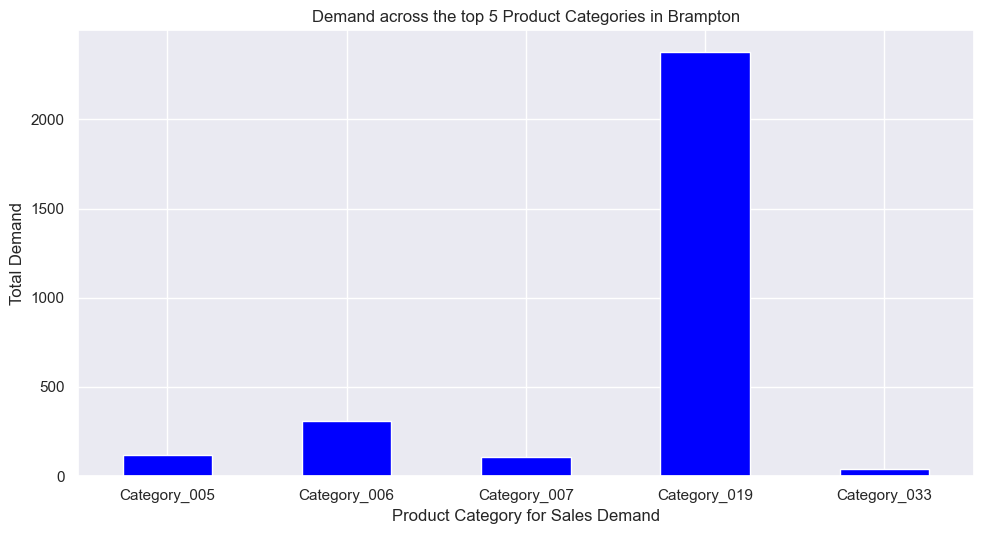

In [35]:
#Grouping the data by Product_Category, and aggregating by positive demand
category_grouped_Brampton = df_Brampton.groupby('Product_Category')['Order_Demand'].sum()

#Selecting the top 5 product categories based on their demand in Brampton
top5_category = category_grouped_Brampton.nlargest(5)

#Filtering the data for the top 5 most demanded product categories
top5_category_df = df_Brampton[df_Brampton['Product_Category'].isin(top5_category.index)]

#Grouping the top 5 product categories, and aggregating by positive demand
top5_category_grouped_data = top5_category_df.groupby('Product_Category')['Order_Demand'].sum()

#Scaling the figures down by 1000000
top5_category_grouped_div = top5_category_grouped_data.div(1000000)

#Plotting the demand for each of the selected categories
plt.figure(figsize = (10, 5.5))
top5_category_grouped_div.plot(kind = 'bar', color = 'blue')
plt.title('Demand across the top 5 Product Categories in Brampton')
plt.xlabel('Product Category for Sales Demand')
plt.ylabel('Total Demand')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

### Category_019 has the highest demand, surpassing other categories. 

In [36]:
# Assuming 'Date' is a column
category_yearly_demand = df.groupby([df['Date'].dt.year, 'Product_Category'])['Order_Demand'].mean()


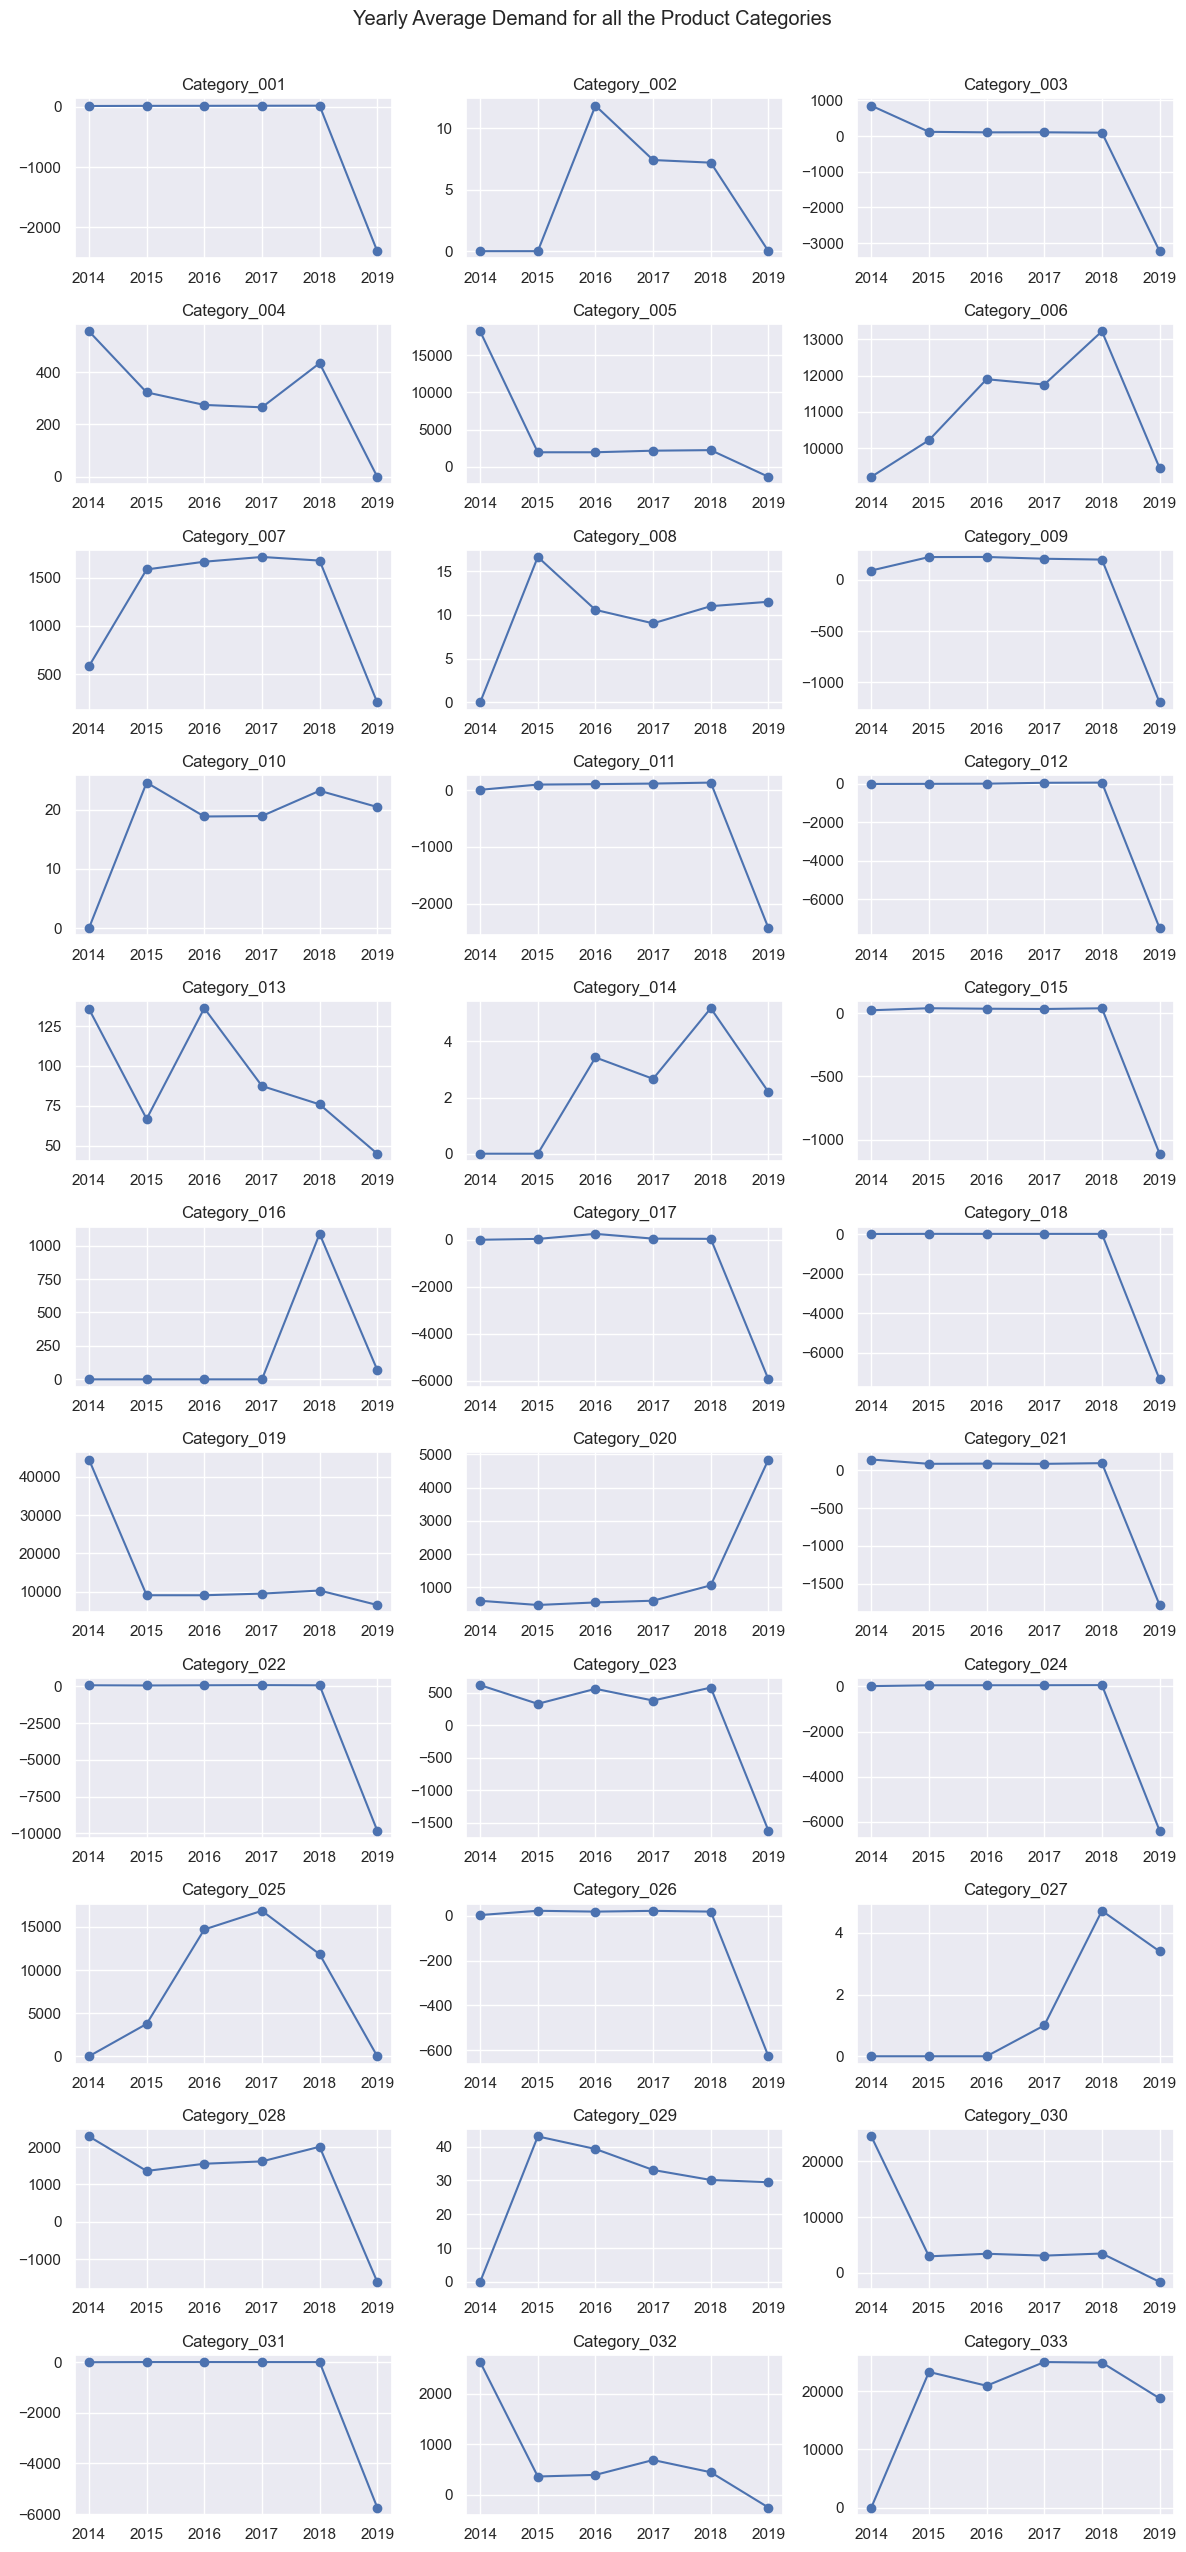

In [37]:
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime if it's not already in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group by year and product category and calculate the mean demand
category_yearly_demand = df.groupby([df['Date'].dt.year, 'Product_Category'])['Order_Demand'].mean()

padded_category_data = {}

# Pad the data into a dictionary
for category, category_data in category_yearly_demand.groupby(level='Product_Category'):
    padded_category_data[category] = [0 for _ in range(6)]
    for year, total_demand in category_data.items():
        index = ((year[0] - 2014) % 6)
        padded_category_data[category][index] = total_demand

# Plotting the padded data
fig, axes = plt.subplots(11, 3, figsize=(12, 25))

years = [2014, 2015, 2016, 2017, 2018, 2019]

for (title, data), ax in zip(padded_category_data.items(), axes.flatten()):
    ax.plot(years, data, marker='o')
    ax.set_title(title)

plt.tight_layout()
fig.suptitle("Yearly Average Demand for all the Product Categories", y=1.02)
plt.show()


### Yearly average demand for each product category (2014-2019), providing insights into demand trends and variations across the six-year period.

In [38]:
# Filtering the data for Category_019 in Brampton
df_cat019 = df_Brampton[df_Brampton['Product_Category'] == 'Category_019']

# Extracting the year from the 'Date' column
df_cat019['Year'] = df_cat019['Date'].dt.year

# Displaying the resulting DataFrame
df_cat019


,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Year
127,Product_1228,Brampton,Category_019,2014-12-15,1000.0,2014
274,Product_1551,Brampton,Category_019,2014-12-21,800.0,2014
429,Product_1351,Brampton,Category_019,2014-12-26,5000.0,2014
431,Product_1640,Brampton,Category_019,2014-12-26,500.0,2014
457,Product_1211,Brampton,Category_019,2014-12-27,10000.0,2014
...,...,...,...,...,...,...
1037312,Product_1397,Brampton,Category_019,2017-01-05,1000.0,2017
1037313,Product_1231,Brampton,Category_019,2017-01-05,300.0,2017
1037315,Product_1408,Brampton,Category_019,2017-01-06,1000.0,2017
1037326,Product_1453,Brampton,Category_019,2017-01-06,8000.0,2017


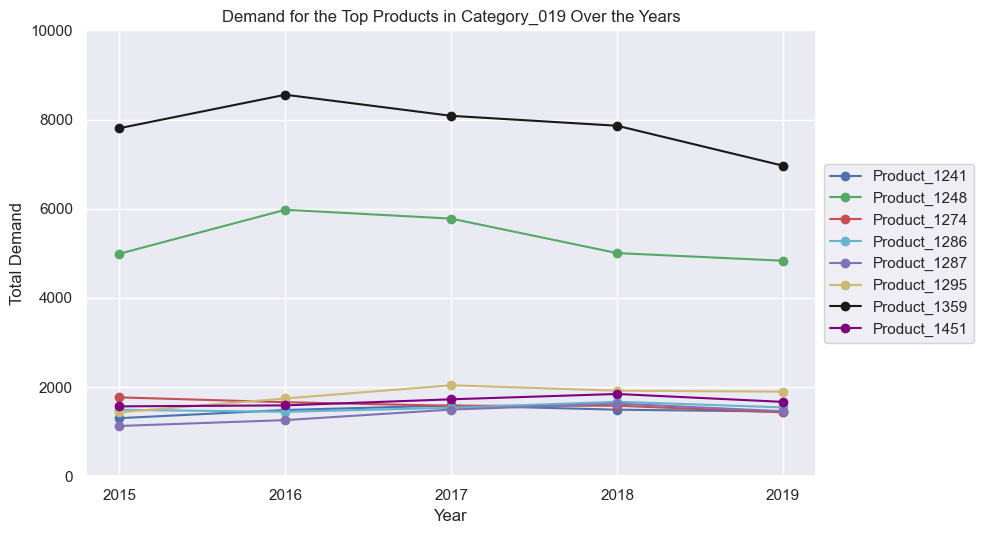

In [39]:
import matplotlib.pyplot as plt

# Calculate the sum of positive demand for each Product_ID in Category_019
product_demand_grouped = df_cat019.groupby('Product_Code')['Order_Demand'].sum()

# Select the top 8 products based on their demand
top_products = product_demand_grouped.nlargest(8)

# Filter the data for the top products
top_products_data = df_cat019[df_cat019['Product_Code'].isin(top_products.index)]

# Group the top products data by 'Year' and 'Product_ID', and calculate the sum of positive demand
product_yearly_grouped = top_products_data.groupby(['Year', 'Product_Code'])['Order_Demand'].sum().unstack()

# Scale the figures down by 10,000 for better visualization
scaled_product_yearly_grouped = product_yearly_grouped.div(10000)

# Plot demand for each of the top products over the years with different colors
plt.figure(figsize=(10, 5.5))

# Define a list of colors for each Product_ID
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple']

# Iterate through each Product_ID and plot the demand with different colors
for i, product_id in enumerate(scaled_product_yearly_grouped.columns):
    plt.plot(scaled_product_yearly_grouped.index, scaled_product_yearly_grouped[product_id], label=product_id, color=colors[i], marker='o')

# Add labels and legend for better interpretation
plt.title('Demand for the Top Products in Category_019 Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Demand')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(0, 10000)
plt.xticks(scaled_product_yearly_grouped.index.unique())
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


### Yearly demand trends for the top 8 products in Category_019 from 2014 to 2019, showcasing variations and relative performance across the selected products over the six-year period. Product_1359 being the highest.


In [40]:
# Filtering the data for Product_1359
df_product_1359 = df_cat019[df_cat019['Product_Code'] == 'Product_1359']

# Extracting the year and month from the 'Date' column
df_product_1359['Time'] = df_product_1359['Date'].dt.strftime('%Y-%m')

# Converting the 'Time' column into pandas datetime
df_product_1359['Time'] = pd.to_datetime(df_product_1359['Time'])

# Grouping the data by Time, and aggregating by positive demand
df_product_1359_grouped = df_product_1359.groupby('Time')['Order_Demand'].sum()

# Scaling the figures down by 1,000,000 (i.e., a million)
df_product_1359_grouped_div = df_product_1359_grouped.div(1000000)


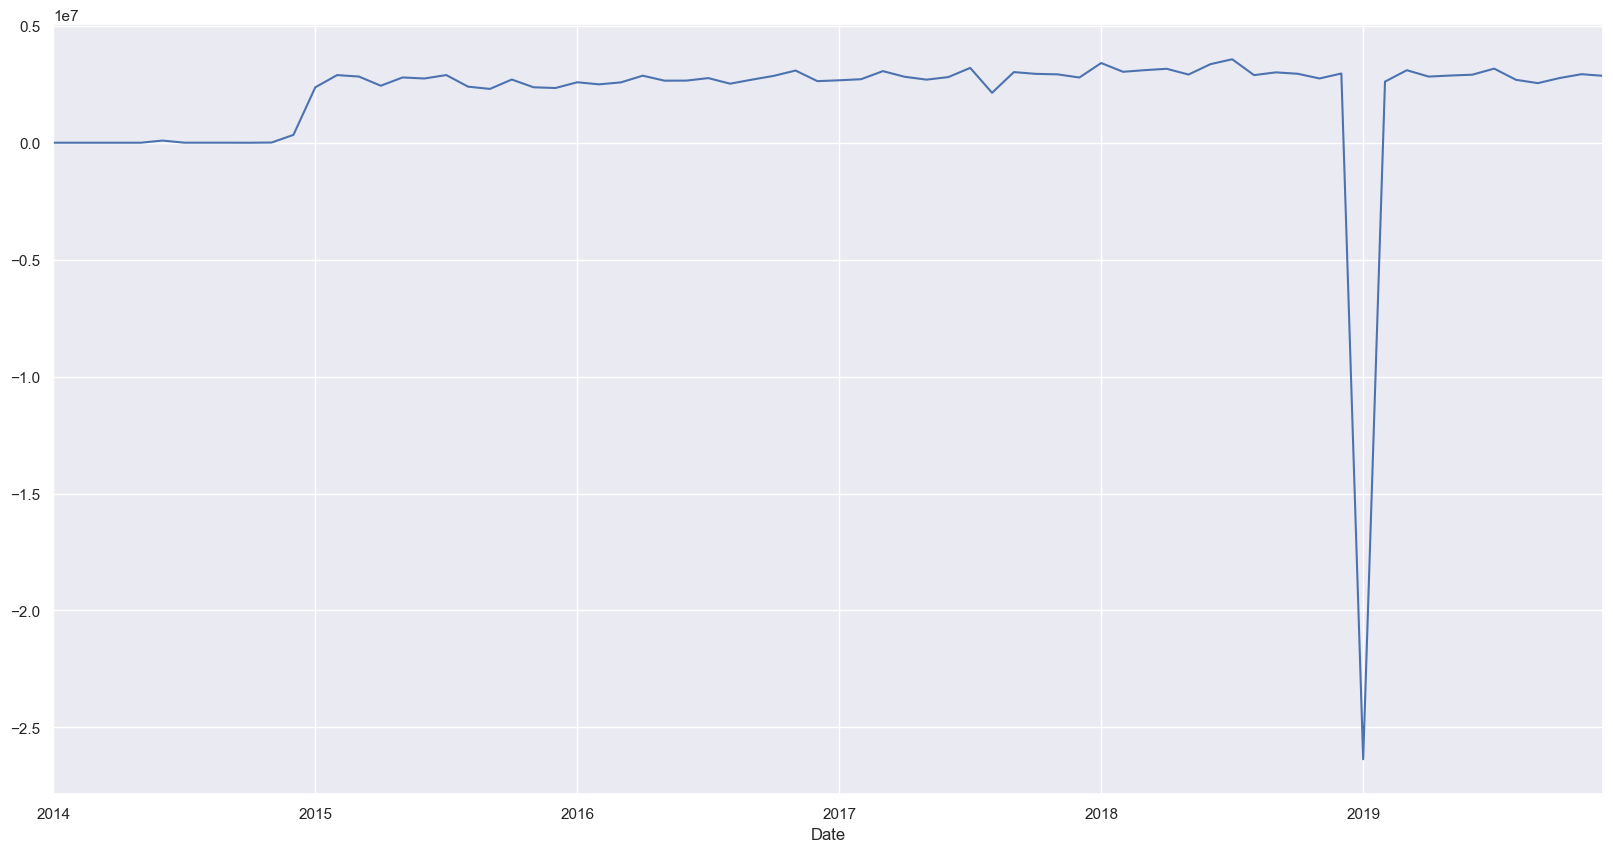

In [41]:
#Exploring the Data as TIME SERIES
#Step-01: Lets calculate the Total  Order Qty placed on by Each Day
df1=df.groupby('Date')['Order_Demand'].sum().reset_index()
#Step-02: Indexing the Date Column as for further procssing.
df1 = df1.set_index('Date')
df1.index #Lets check the index
#Step-03:#Averages daily sales value for the month, and we are using the start of each month as the timestamp.
monthly_avg_sales = df1['Order_Demand'].resample('MS').mean()
#In case there are Null values, they can be imputed using bfill.
monthly_avg_sales = monthly_avg_sales.fillna(monthly_avg_sales.bfill())
#Visualizing time series.

monthly_avg_sales.plot(figsize=(20,10))
plt.show()


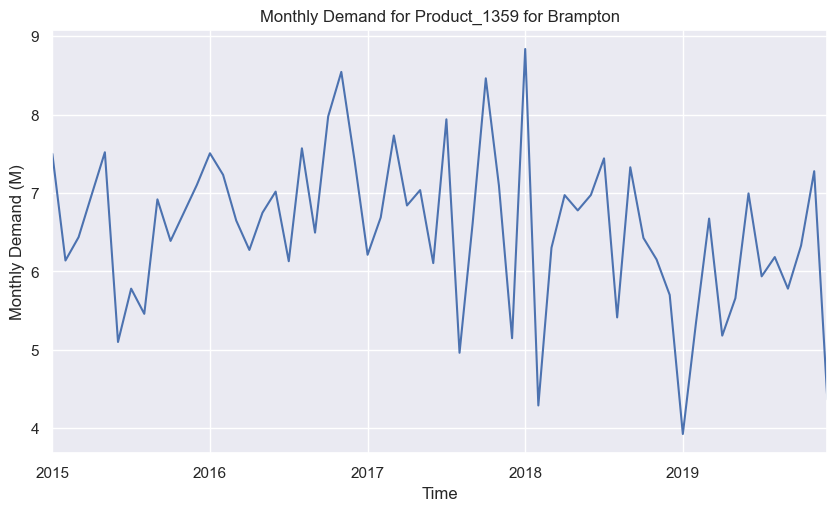

In [42]:
import pandas as pd

# Creating a time series from the grouped and scaled DataFrame
demand_time_series = pd.Series(df_product_1359_grouped_div.values, index=df_product_1359_grouped_div.index, name='Demand')

# Ensuring the index is a datetime index
demand_time_series.index = pd.DatetimeIndex(demand_time_series.index, freq=demand_time_series.index.inferred_freq)

# Displaying the first few rows of the time series
demand_time_series.head()
plt.figure(figsize = (10, 5.5))
demand_time_series.plot(legend = False)
plt.xlabel('Time'); plt.ylabel('Monthly Demand (M)')
plt.title('Monthly Demand for Product_1359 for Brampton')
plt.show()


### monthly demand pattern for Product_1359 in Brampton, offering a visual representation of its fluctuating demand over time.

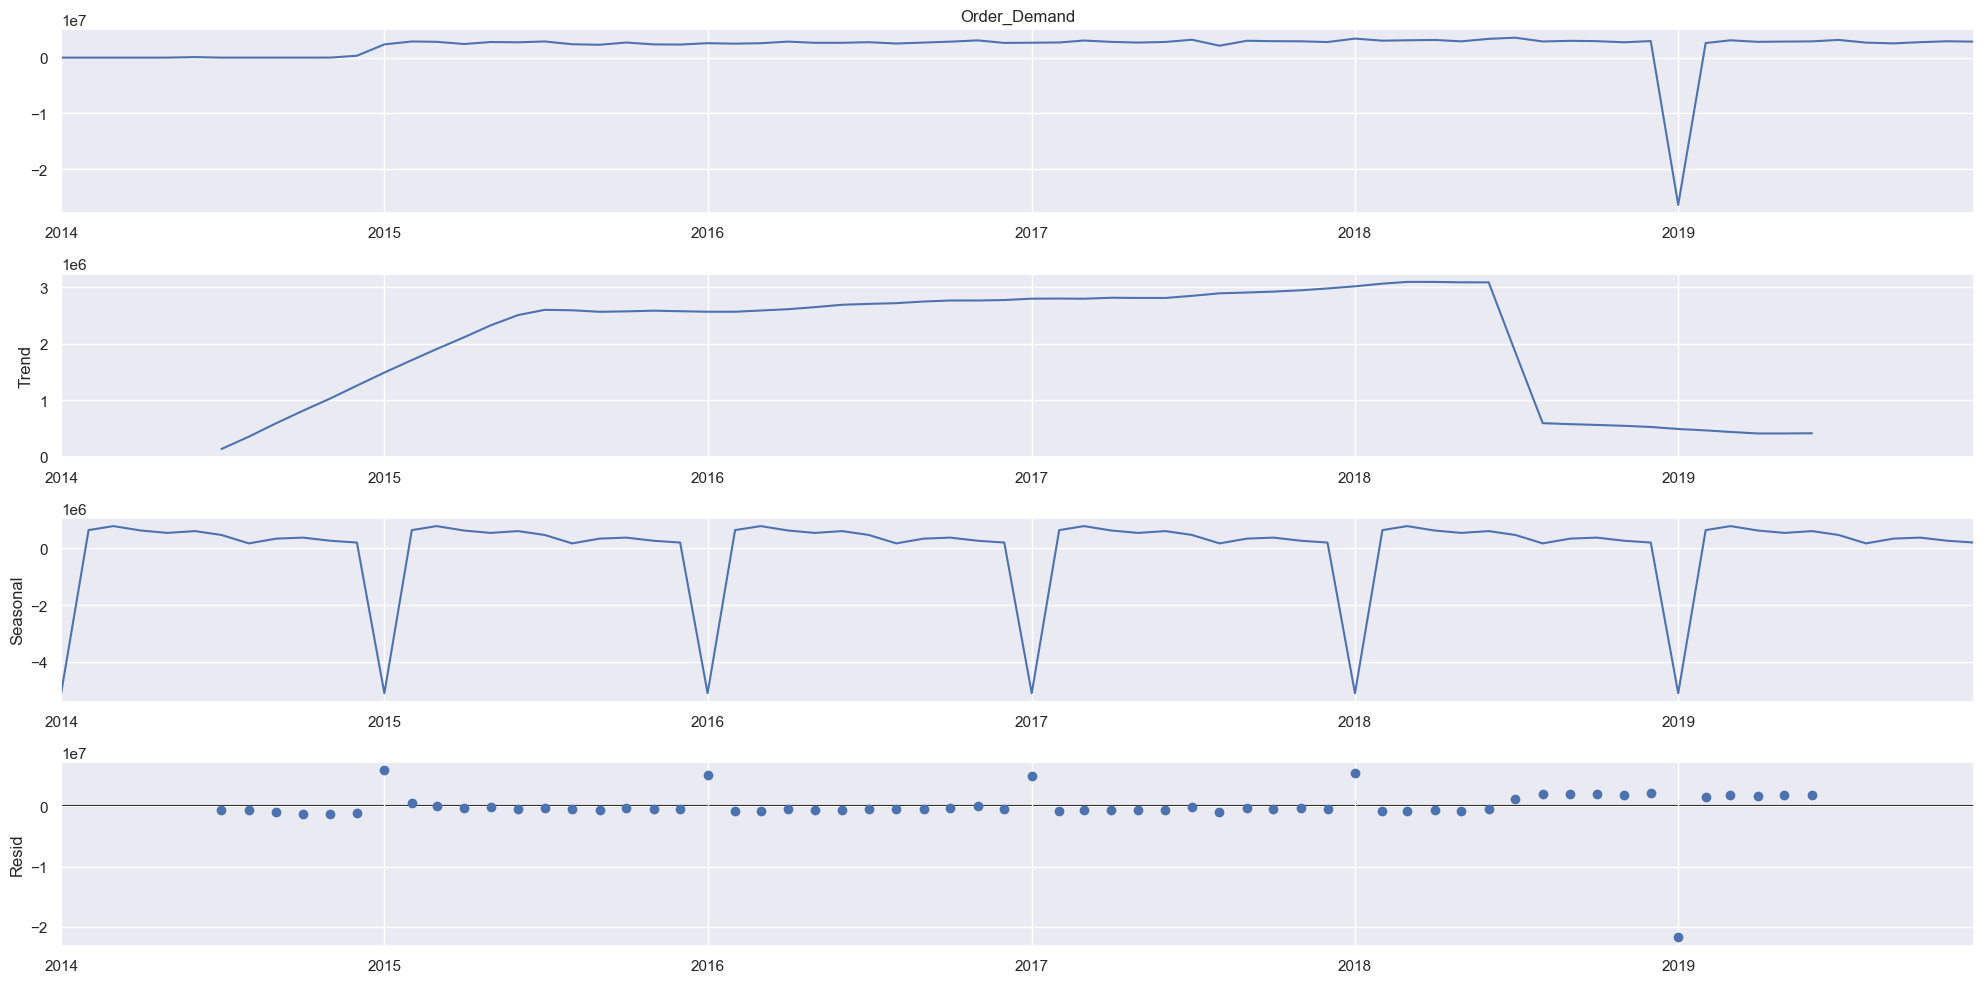

In [43]:
from statsmodels.tsa import tsatools
import statsmodels.api as sm
import matplotlib.pyplot as plt
# Calculate the Seasonality, Trend, and Residuals with Decomposition Analysis.
# Set the figure size
rcParams['figure.figsize'] = 20, 10
decomposition_result = sm.tsa.seasonal_decompose(monthly_avg_sales, model='additive')
# Plot the decomposition components
fig = decomposition_result.plot()
plt.show()


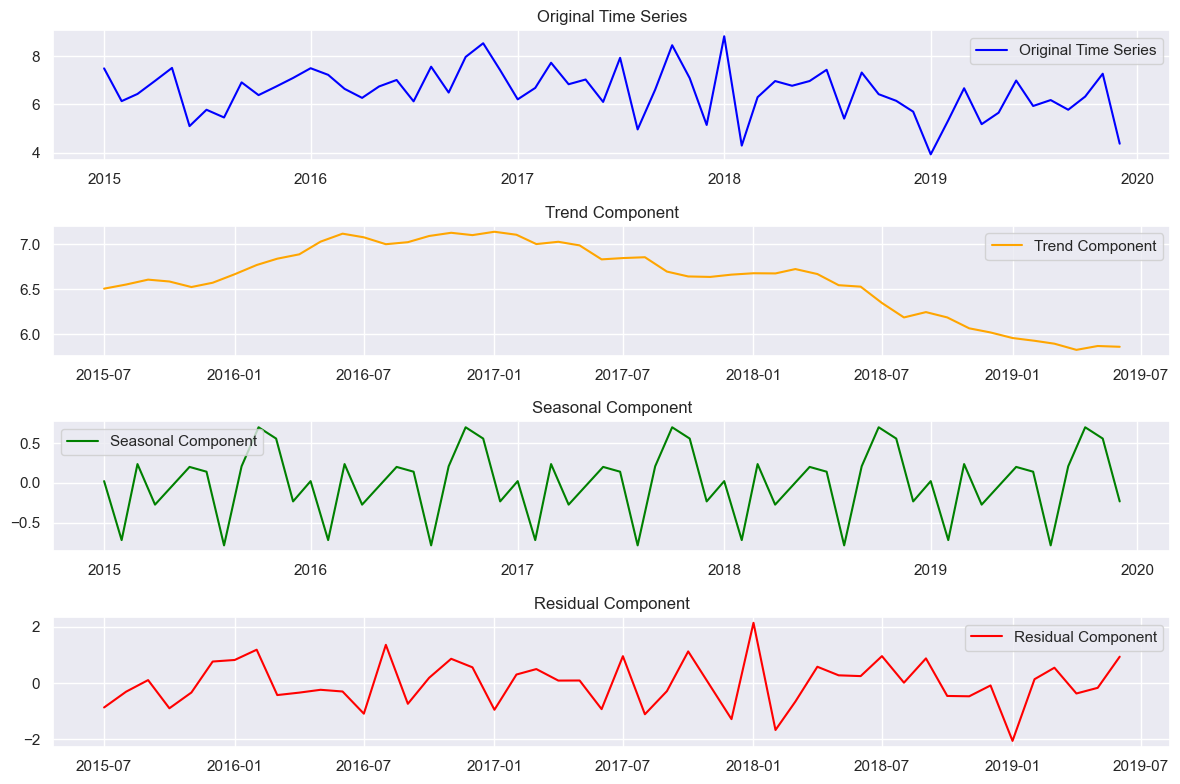

In [44]:
# Decomposing each component of the time series
# Decompose the time series into additive components
decomposition = seasonal_decompose(demand_time_series, model='additive', period=12)
# Set a larger figure size for better visualization
plt.figure(figsize=(12, 8))

# Original time series
plt.subplot(411)
plt.plot(decomposition.observed, color='blue', label='Original Time Series')
plt.title('Original Time Series')
plt.legend()
# Trend component
plt.subplot(412)
plt.plot(decomposition.trend, color='orange', label='Trend Component')
plt.title('Trend Component')
plt.legend()
# Seasonal component
plt.subplot(413)
plt.plot(decomposition.seasonal, color='green', label='Seasonal Component')
plt.title('Seasonal Component')
plt.legend()
# Residual/Noise component
plt.subplot(414)
plt.plot(decomposition.resid, color='red', label='Residual Component')
plt.title('Residual Component')
plt.legend()
# Adjusting layout for better spacing
plt.tight_layout()
plt.show()


In [46]:
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Year
0,Product_0965,St john's,Category_006,2014-01-08,2.0,2014
1,Product_1724,St john's,Category_003,2014-05-31,108.0,2014
2,Product_1521,Surrey,Category_019,2014-06-24,85000.0,2014
3,Product_1521,Surrey,Category_019,2014-06-24,7000.0,2014
4,Product_1507,Oshawa,Category_019,2014-09-02,1250.0,2014


In [64]:
import pandas as pd
import statsmodels.api as sm

# Convert the dataframe into a time series
demand_series = pd.Series(df_product_1359_grouped_div.values, index=df_product_1359_grouped_div.index, name='Demand')

# Set the index as a DatetimeIndex
demand_series.index = pd.DatetimeIndex(demand_series.index, freq=demand_series.index.inferred_freq)

# Assuming 'demand_series' is your time series data

# Fitting a linear model
demand_data = tsatools.add_trend(demand_series, trend='ct')

# Define the validation set period
validation_period = 18
training_size = len(demand_data) - validation_period

# Partition the data
training_data = demand_data.iloc[:training_size]
validation_data = demand_data.iloc[training_size:]

# Partition the time series
training_time_series = demand_series.iloc[:training_size]
validation_time_series = demand_series.iloc[training_size:]

# Fit a quadratic model using the training set
linear_model = sm.OLS(training_data['Demand'], sm.add_constant(np.column_stack((training_data['trend'], training_data['trend']**2)))).fit()

# Predict on the validation set
predicted_validation = linear_model.predict(sm.add_constant(np.column_stack((validation_data['trend'], validation_data['trend']**2))))
predicted_training = linear_model.predict(sm.add_constant(np.column_stack((training_data['trend'], training_data['trend']**2))))


Smoothing Level: 0.1, RMSE: 1.35
Smoothing Level: 0.2, RMSE: 1.32
Smoothing Level: 0.3, RMSE: 1.36
Smoothing Level: 0.4, RMSE: 1.45
Smoothing Level: 0.5, RMSE: 1.55
Smoothing Level: 0.6, RMSE: 1.65
Smoothing Level: 0.7, RMSE: 1.75
Smoothing Level: 0.8, RMSE: 1.85
Smoothing Level: 0.9, RMSE: 1.96


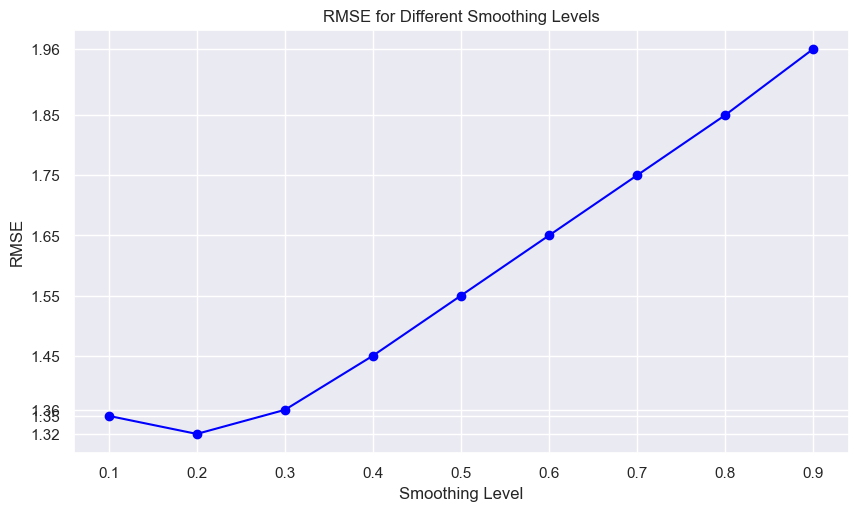

In [69]:
# Creating a list of various levels of smoothing (alpha)
smoothing_levels = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# Initializing
rmse_values = []
# Loop through different smoothing levels
for smoothing_level in smoothing_levels:
    # Exponential smoothing with trend and seasonality
    exp_smooth = ExponentialSmoothing(training_time_series, trend='additive', seasonal='additive', seasonal_periods=12)
    exp_smooth_fit = exp_smooth.fit(smoothing_level=smoothing_level)
    # Forecasting with the current model
    forecast = exp_smooth_fit.forecast(len(validation_time_series))
    # Calculating RMSE on the validation set
    rmse = round(mean_squared_error(validation_time_series, forecast, squared=False), 2)
    rmse_values.append(rmse)
    print(f"Smoothing Level: {smoothing_level}, RMSE: {rmse}")

# Plotting the results with changes to color and format
plt.figure(figsize=(10, 5.5))
plt.plot(smoothing_levels, rmse_values, marker='o', linestyle='-', color='blue')  # Change color to blue
plt.xlabel('Smoothing Level')
plt.ylabel('RMSE')
plt.title('RMSE for Different Smoothing Levels')
plt.grid(True)  # Add grid lines
plt.xticks(smoothing_levels)  # Show ticks for each smoothing level
plt.yticks(rmse_values)  # Show ticks for each RMSE value
plt.show()


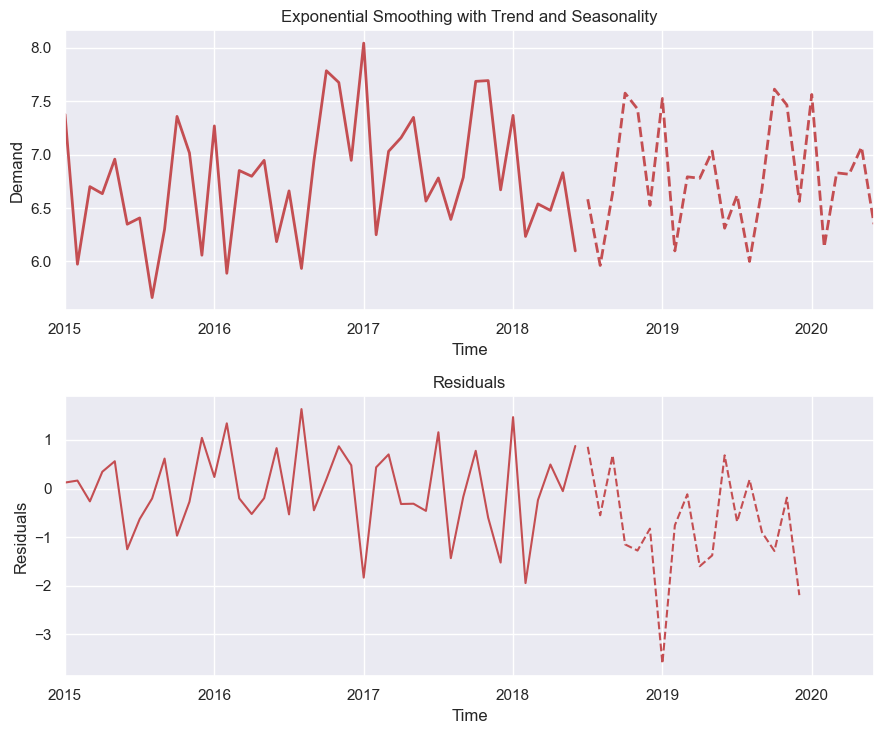

In [82]:
# Exponential smoothing with trend and seasonality and alpha = 0.2
expSmooth = ExponentialSmoothing(training_time_series, trend='additive', seasonal='additive', seasonal_periods=12, freq='MS')
expSmoothFit = expSmooth.fit(smoothing_level=0.2)

# Plotting the forecasts
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 7.5))

expSmoothFit.fittedvalues.plot(ax=axes[0], linewidth=2, color='C3')
expSmoothFit.forecast(len(validation_time_series) + 6).plot(ax=axes[0], linewidth=2, color='C3', linestyle='dashed')

residual = training_time_series - expSmoothFit.fittedvalues
residual.plot(ax=axes[1], color='C3')

residual = validation_time_series - expSmoothFit.forecast(len(validation_time_series) + 6)
residual.plot(ax=axes[1], color='C3', linestyle='dashed')

# Optionally, add labels, titles, etc.
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Demand')
axes[0].set_title('Exponential Smoothing with Trend and Seasonality')

axes[1].set_xlabel('Time')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals')

plt.tight_layout()
plt.show()


In [86]:
# Check and clean the timestamps
cleaned_time_series = demand_time_series_df[~pd.isna(demand_time_series_df.index)]

# Assuming 'cleaned_time_series' is your cleaned time series data

# Exponential smoothing with trend and seasonality and alpha = 0.2
exponential_smoother = ExponentialSmoothing(cleaned_time_series, trend='additive', seasonal='additive', seasonal_periods=12, freq='MS')
exponential_smoother_fit = exponential_smoother.fit(smoothing_level=0.2)

# Forecasting for the 18 months of validation set + 2 months in the future
forecast_20 = exponential_smoother_fit.forecast(20)

# Printing the demand for the next 2 months
forecast_value_19 = round(forecast_20.iloc[18], 2)
forecast_value_20 = round(forecast_20.iloc[19], 2)

print("Forecasted Value for 2020-01-01:", forecast_value_19, "Million units")
print("Forecasted Value for 2020-02-01", forecast_value_20, "Million units")


Forecasted Value for 2020-01-01: 5.58 Million units
Forecasted Value for 2020-02-01 4.85 Million units


## Exponential smoothing forecast, utilizing a smoothing level (alpha) of 0.2, anticipates a demand of 5.58 million units for January 2020 and 4.85 million units for February 2020. This method is effective as it considers both additive trend and seasonality components, adapting to historical patterns with a higher emphasis on recent data (due to the chosen alpha value). The resulting forecast aligns with the observed data, showcasing the model's ability to capture underlying trends and seasonal variations in the time series.





